Step 1. 세계 일어난 테러를 1970 ~ 2016년까지의 기간을 두고 연도별 숫자로 시각화
-

먼저 데이터를 확보하고(CSV파일)
칼럼명(년도, 월, 일, 나라, 지역, 테러장소 등등 )설정하기

In [295]:
import pandas as pd

terror = pd.read_csv('../data/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year', 'imonth':'Month',
                       'iday':'Day', 'country_txt':'Country',
                       'region_txt':'Region', 'attacktype1_txt':'AttackType',
                       'target1':'Target', 'nkill':'Killed',
                       'nwound':'Wounded', 'summary':'Summary',
                       'gname':'Group', 'targtype1_txt':
                       'Target_type', 'weaptype1_txt':
                       'Weapon_type', 'motive':'Motive'},
              inplace=True)

terror = terror[['Year', 'Month', 'Day', 'Country', 'Region', 'city',
                 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
                 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive']]
terror['casualities'] = terror['Killed'] + terror['Wounded']
terror.head()

/tmp/ipykernel_18412/425904797.py:3: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror = pd.read_csv('../data/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


테러발생이 증가한 연도는?

/tmp/ipykernel_18412/1800173357.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=terror, palette='RdYlGn_r', edgecolor=sns.color_palette('dark',7))


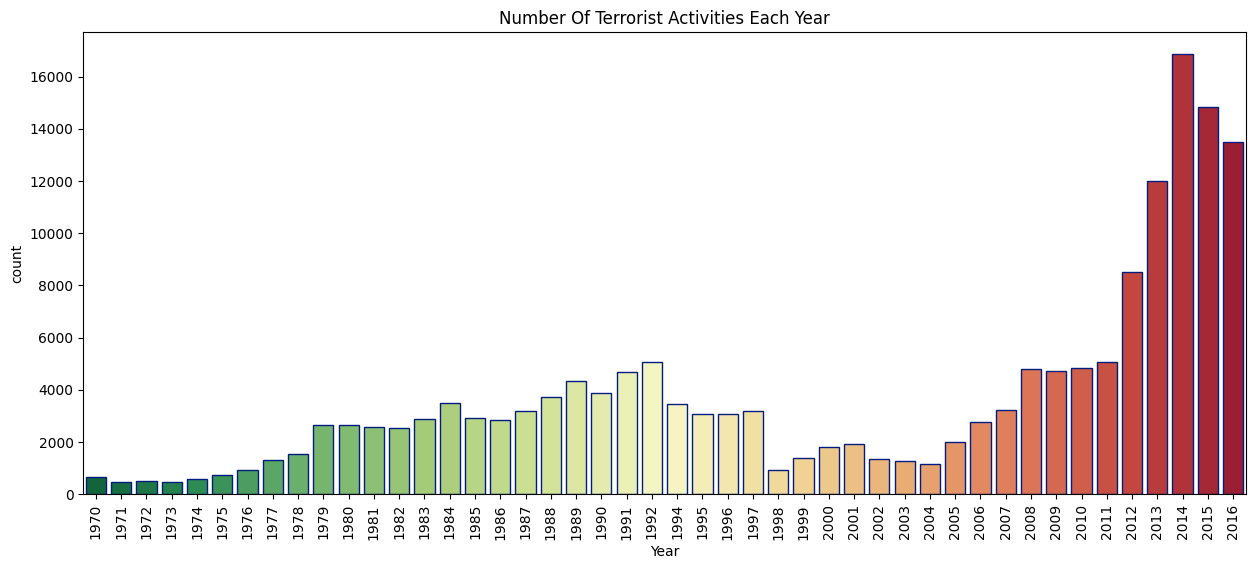

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.subplots(figsize=(15,6))
sns.countplot(x='Year', data=terror, palette='RdYlGn_r', edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

연도별로 테러활동을 데이터 프레임으로 만들어주기

In [297]:
# 테러 데이터셋에서 'Year' 변수를 기준으로 빈도 계산
count = terror['Year'].value_counts().reset_index()
count.columns = ['Year', 'Count']

# DataFrame으로 만들어진 count 출력
print(count)

    Year  Count
0   2014  16860
1   2015  14852
2   2016  13488
3   2013  11996
4   2012   8500
5   1992   5073
6   2011   5071
7   2010   4822
8   2008   4803
9   2009   4719
10  1991   4683
11  1989   4323
12  1990   3887
13  1988   3720
14  1984   3495
15  1994   3458
16  2007   3241
17  1997   3200
18  1987   3184
19  1995   3081
20  1996   3056
21  1985   2915
22  1983   2870
23  1986   2860
24  2006   2749
25  1980   2662
26  1979   2661
27  1981   2585
28  1982   2545
29  2005   2009
30  2001   1907
31  2000   1813
32  1978   1526
33  1999   1395
34  2002   1332
35  1977   1319
36  2003   1262
37  2004   1162
38  1998    933
39  1976    923
40  1975    740
41  1970    651
42  1974    580
43  1972    496
44  1973    473
45  1971    470


그래프로 정리

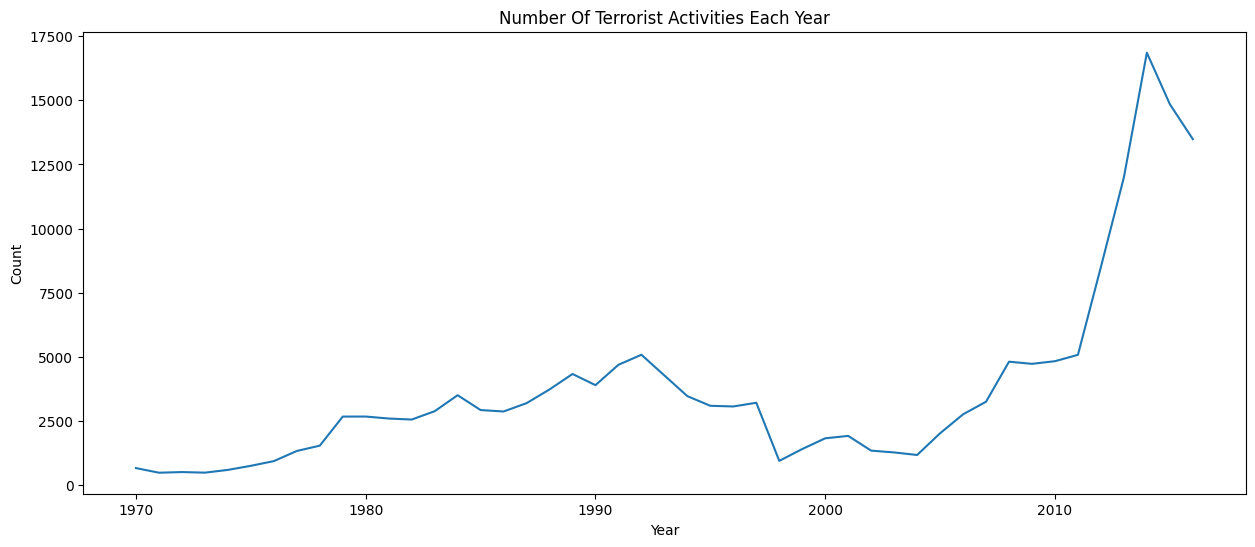

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.subplots(figsize=(15,6))
sns.lineplot(x='Year',y='Count', data=count)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

연도별 사망자 수는?

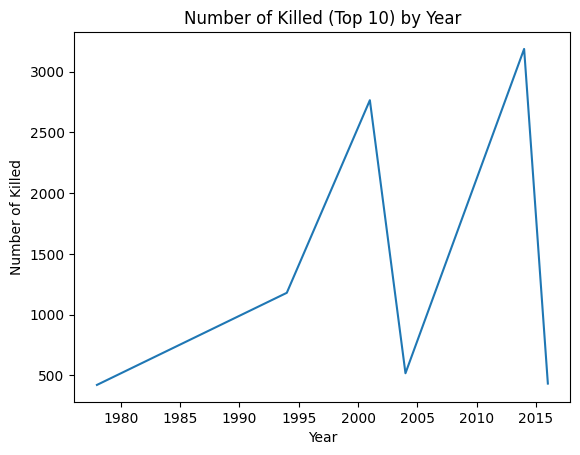

In [299]:
# 상위 10개 데이터 추출
top_10_killed = terror.nlargest(10, 'Killed')

# 년도별 사망자 수 계산
yearly_killed = top_10_killed.groupby('Year')['Killed'].sum()

# 그래프 그리기
plt.plot(yearly_killed.index, yearly_killed.values)
plt.xlabel('Year')
plt.ylabel('Number of Killed')
plt.title('Number of Killed (Top 10) by Year')

# 그래프 출력
plt.show()

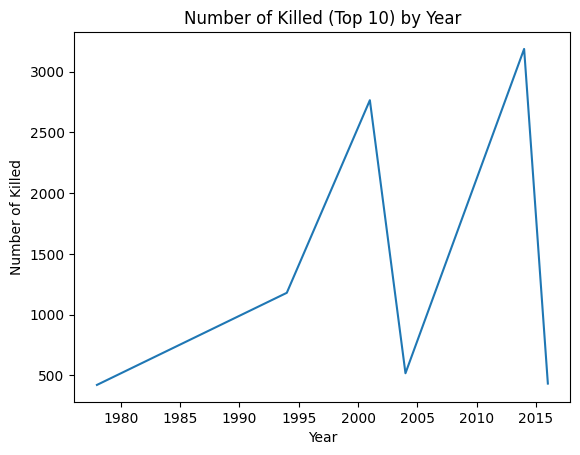

In [300]:
# 상위 10개 데이터 추출
top_10_killed = terror.nlargest(10, 'Killed')

# 년도별 사망자 수 계산
yearly_killed = top_10_killed.groupby('Year')['Killed'].sum()

# 그래프 그리기
plt.plot(yearly_killed.index, yearly_killed.values)
plt.xlabel('Year')
plt.ylabel('Number of Killed')
plt.title('Number of Killed (Top 10) by Year')

# 그래프 출력
plt.show()

2001년도 미국 911테러 이후 2004년, 2014년에 테러로 사망자가 가장 많다고 볼 수 있겠습니다.

그러면 지도에 국가별로 시각화해보자

어떻게?

1. 설정을 지도 위에 원 형태의 마커를 표시
2. 사망자 수 Killed 값에 비례해서 원 형태의 크기를 나타내기 + 빨강색으로 표시

In [308]:
import numpy as np
import folium

terror_killed_sort = terror.sort_values('Killed', ascending=False)[:1000]

map2 = folium.Map(location=[30,0], tiles='OpenStreetMap', zoom_start=3)
for _, row in terror_killed_sort[0:100].iterrows():
    if ~np.isnan(row['latitude']):
        folium.CircleMarker(location=[row['latitude'], row['longitude']],
                            radius=row['Killed']/100, fill=True,
                            color='red', fill_opacity=0.7).add_to(map2)
map2

찾아보니

Step 2. 테러가 많이 일어난 나라중 사망자수를 포함해 상위 10위 순으로 시각화해보자
==

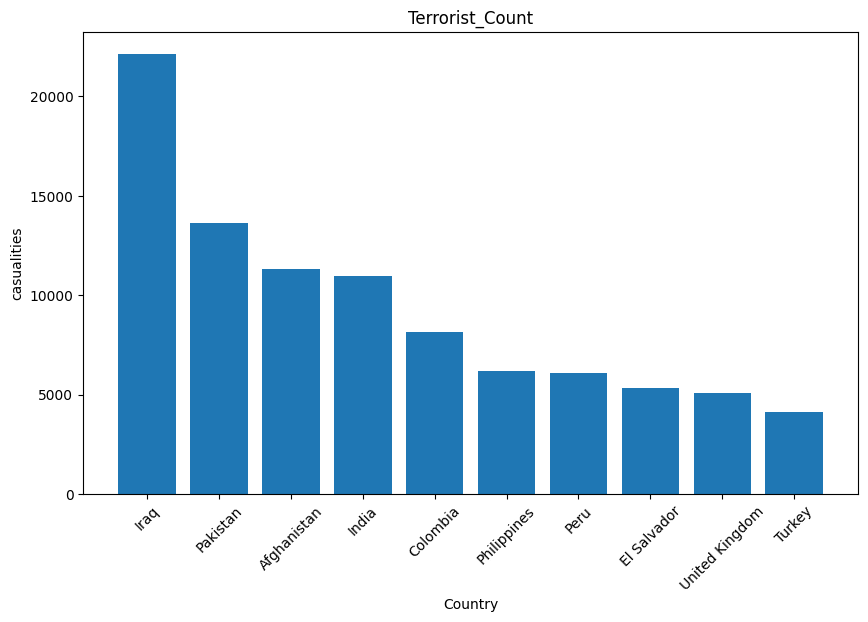

In [302]:
import matplotlib.pyplot as plt

# 국가별 테러 발생 건수 계산
terror_by_country = terror.groupby('Country').size().reset_index(name='Terrorist_Count')

# 상위 10개 국가 추출
top_10_countries = terror_by_country.nlargest(10, 'Terrorist_Count')

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['Country'], top_10_countries['Terrorist_Count'])
plt.xlabel('Country')
plt.ylabel('casualities')
plt.title('Terrorist_Count')
plt.xticks(rotation=45)
plt.show()

테러가 가장 많이 일어난 나라의 비율을 시각화

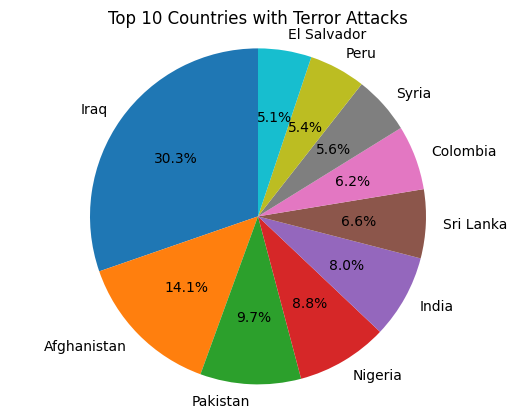

In [303]:
# 상위 10개 나라 추출
top_10_countries = terror.groupby('Country')['Killed'].sum().nlargest(10)

# 원 그래프 그리기
plt.pie(top_10_countries.values, labels=top_10_countries.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Top 10 Countries with Terror Attacks')

# 그래프 출력
plt.show()

영향을 가장 많이 받는 지역은 어디일까?

/tmp/ipykernel_18412/205969290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=terror, palette='RdYlGn',


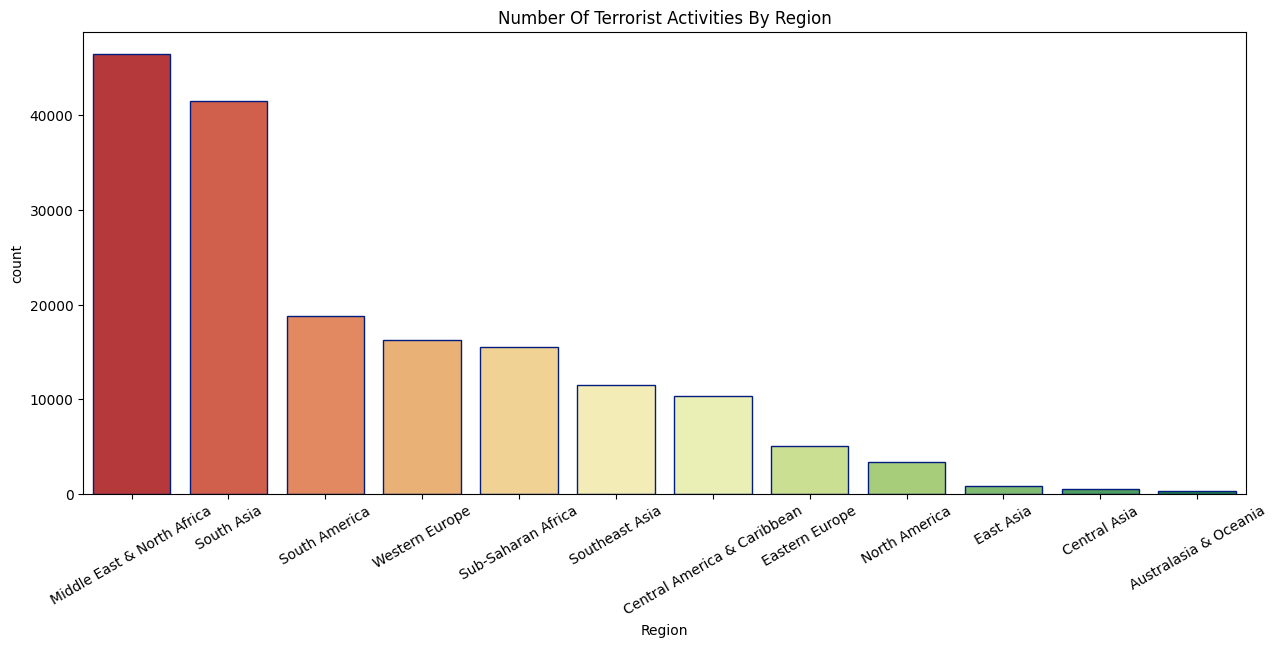

In [304]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Region', data=terror, palette='RdYlGn',
              edgecolor=sns.color_palette('dark',7),
              order=terror['Region'].value_counts().index)
plt.xticks(rotation=30)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

Step 3.특정 연도 이전테러 경향과 그 후의 테러 경향
==

특정연도를 2012년 기준으로 이전, 이후의 테러 발생 국가를 색상으로 구별하여 지도 시각화

1. 2012년 이전과 이후에 일어난 테러 발생 국가 리스트 분류 만들기
2. 지도에 색상 표시(이전은 파란색, 이후는 빨간색)

In [317]:
terror = terror[['Year', 'Country']]
terror_before_2012 = terror[terror['Year'] < 2012]
terror_after_2012 = terror[terror['Year'] >= 2012]

country_list_before_2012 = terror_before_2012['Country'].unique()
country_list_after_2012 = terror_after_2012['Country'].unique()

df_before_2012 = pd.DataFrame({'Country': country_list_before_2012, 'Period': 'Before'})
df_after_2012 = pd.DataFrame({'Country': country_list_after_2012, 'Period': 'After'})

result_df = pd.concat([df_before_2012, df_after_2012])

print(result_df)

                Country  Period
0    Dominican Republic  Before
1                Mexico  Before
2           Philippines  Before
3                Greece  Before
4                 Japan  Before
..                  ...     ...
133              Poland   After
134              Angola   After
135              Guyana   After
136     Slovak Republic   After
137        Sierra Leone   After

[342 rows x 2 columns]


In [320]:
from mpl_toolkits.basemap import Basemap


m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(terror[terror['casualities']>=75].latitude)
long_100=list(terror[terror['casualities']>=75].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(terror[terror['casualities']<75].latitude)
long_=list(terror[terror['casualities']<75].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()

KeyError: 'casualities'

In [311]:
import folium
print(f"folium Version: {folium.__version__}")

folium Version: 0.15.1


In [312]:
# 위도, 경도
lat, lon = 37.504811111562, 127.025492036104
# 줌 크기
zoom_size = 12

In [313]:
# 구글 지도 타일 설정
tiles = "http://mt0.google.com/vt/lyrs=s&hl=ko&x={x}&y={y}&z={z}"
# 속성 설정
attr = "Google"
# 지도 객체 생성
m = folium.Map(location = [lat, lon],
               zoom_start = zoom_size,
               tiles = tiles,
               attr = attr)
m

테러 형태

/tmp/ipykernel_18412/1708426502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weapon_type', y='Count', data=top_Weapons, palette='vlag')


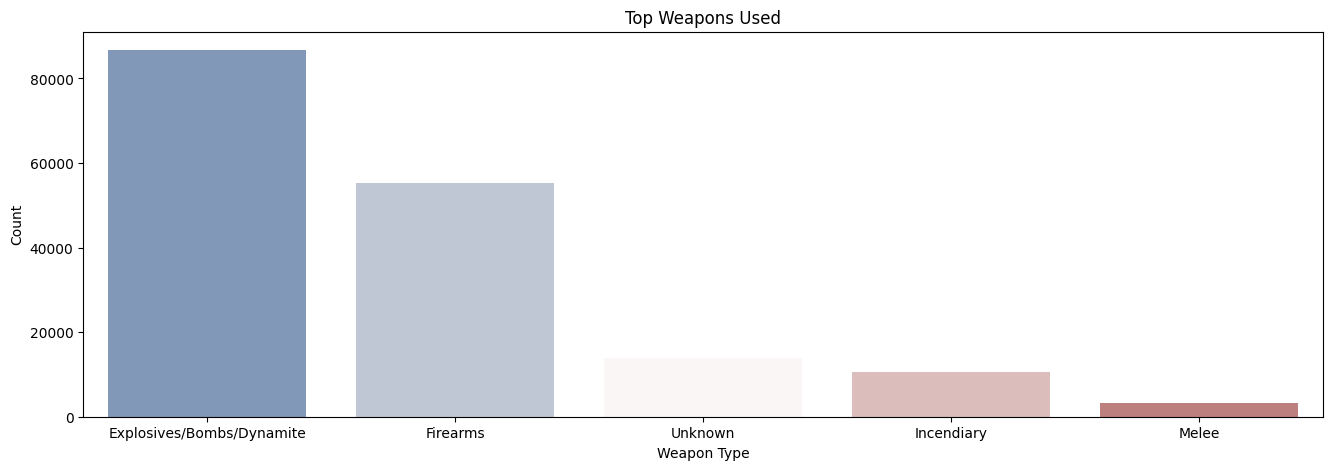

In [306]:
plt.subplots(figsize=(16,5))


top_Weapons = terror['Weapon_type'].value_counts()[:5].to_frame().reset_index()
top_Weapons.columns = ['Weapon_type', 'Count']
sns.barplot(x='Weapon_type', y='Count', data=top_Weapons, palette='vlag')



plt.title('Top Weapons Used')
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.xticks()
plt.show()

원 그래프로 비율를 보는 시각화

<Axes: ylabel='count'>

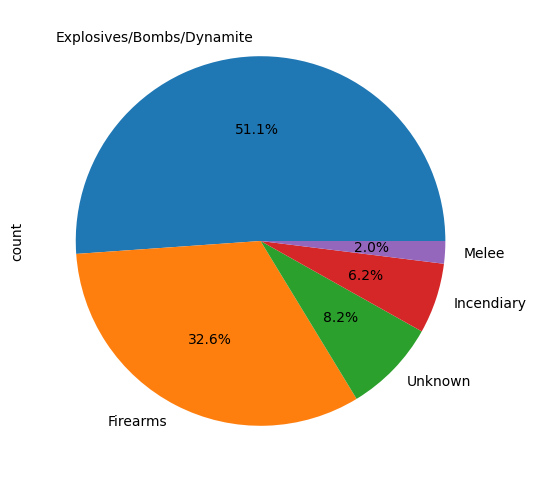

In [307]:
top5_Weapon=terror['Weapon_type'].value_counts()[:5]
top5_Weapon.plot(kind='pie',autopct="%1.1f%%",figsize=(7,6))